In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from scipy.stats import zscore

In [3]:
titanic = sns.load_dataset('titanic')
titanic = titanic.copy()
titanic = titanic.dropna()

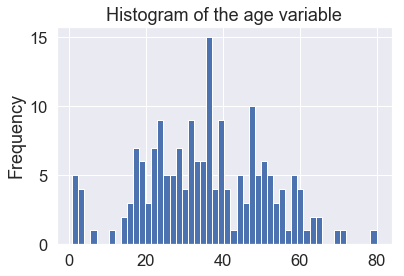

In [4]:
titanic['age'].plot.hist(
  bins = 50,
  title = "Histogram of the age variable"
);

** Z-score **
- It looks a little bit like Gaussian distribution so we will use z-score. 

- Z-score is the difference between the value and the sample mean expressed as the number of standard deviations. 

- If the z-score is smaller than -2.5 or larger than 2.5, the value is in the 5% of smallest or largest values (2.5% of values at both ends of the distribution).

In [5]:
titanic["age_zscore"] = zscore(titanic["age"])


In [6]:
titanic["age_zscore"].describe()

count    1.820000e+02
mean     1.464030e-17
std      1.002759e+00
min     -2.220506e+00
25%     -7.437173e-01
50%      2.411064e-02
75%      7.759421e-01
max      2.839480e+00
Name: age_zscore, dtype: float64

In [7]:
titanic[(titanic['age_zscore'] >= 2.5) | (titanic['age_zscore'] <= -2.5)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_zscore
630,1,1,male,80.0,0,0,30.0,S,First,man,True,A,Southampton,yes,True,2.83948


We have found the one person who is older than the other Titanic passengers

# DBSCAN — Density-Based Spatial Clustering of Applications with Noise

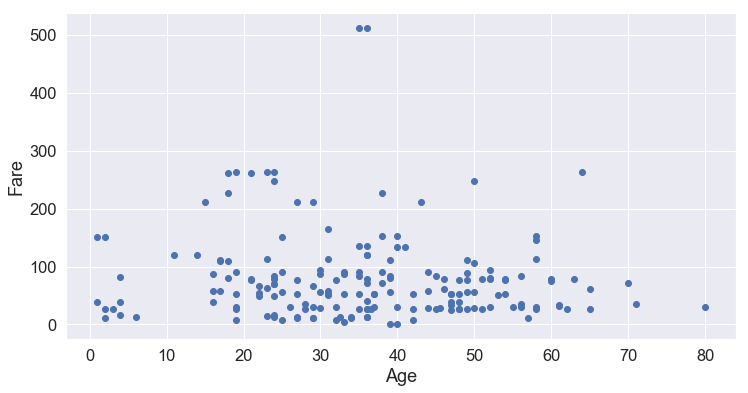

In [8]:
ageAndFare = titanic[["age", "fare"]]

plt.figure(figsize=(12, 6))
#ageAndFare.plot.scatter(x = "age", y = "fare")
plt.scatter(x = ageAndFare["age"], y = ageAndFare["fare"])

plt.xlabel('Age')
plt.ylabel('Fare');

We see two points with a large value of the “fare” attribute.

We also see that both variables have different scales. Because of that, the distance would be dominated by the fare variable. We don’t want that so we must normalize variables.

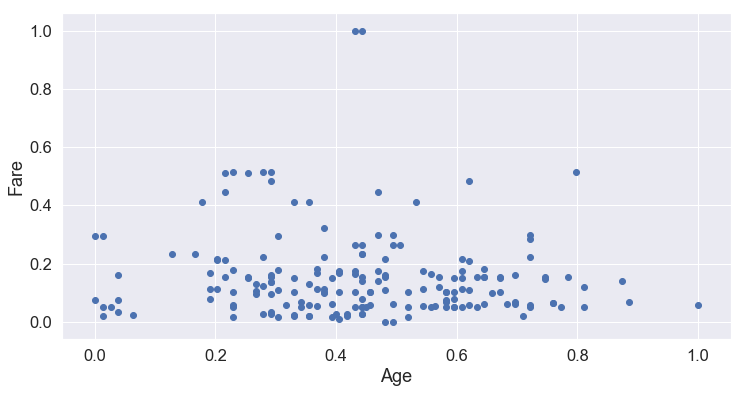

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

ageAndFare = scaler.fit_transform(ageAndFare)

ageAndFare = pd.DataFrame(ageAndFare, columns = ["age", "fare"])

#ageAndFare.plot.scatter(x = "age", y = "fare")
plt.figure(figsize=(12, 6))
#ageAndFare.plot.scatter(x = "age", y = "fare")
plt.scatter(x = ageAndFare["age"], y = ageAndFare["fare"])

plt.xlabel('Age')
plt.ylabel('Fare');

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)

clusters = outlier_detection.fit_predict(ageAndFare)

In [13]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

we have found two outliers.

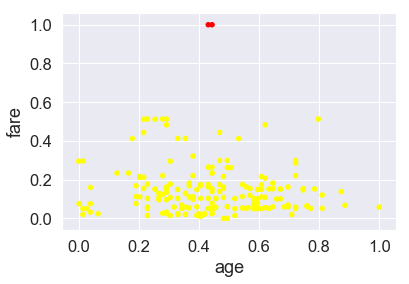

In [42]:
from matplotlib import cm
cmap = cm.get_cmap('autumn')

ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
);